In [1]:
#Import pyhton libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
#Import Csv file using pandas
df=pd.read_csv('C:\\Users\\hp\Desktop\\placements\\Python\\EDA Project\\EDA Project-1 --Diwali Sales Report\\data.csv',encoding='unicode_escape')

In [18]:
df.shape

(11251, 15)

In [209]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [23]:
#Drop blank columns 
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [25]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [26]:
#Drop null values
df.dropna(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [30]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


EXPLORATORY DATA ANALYSIS

Gender


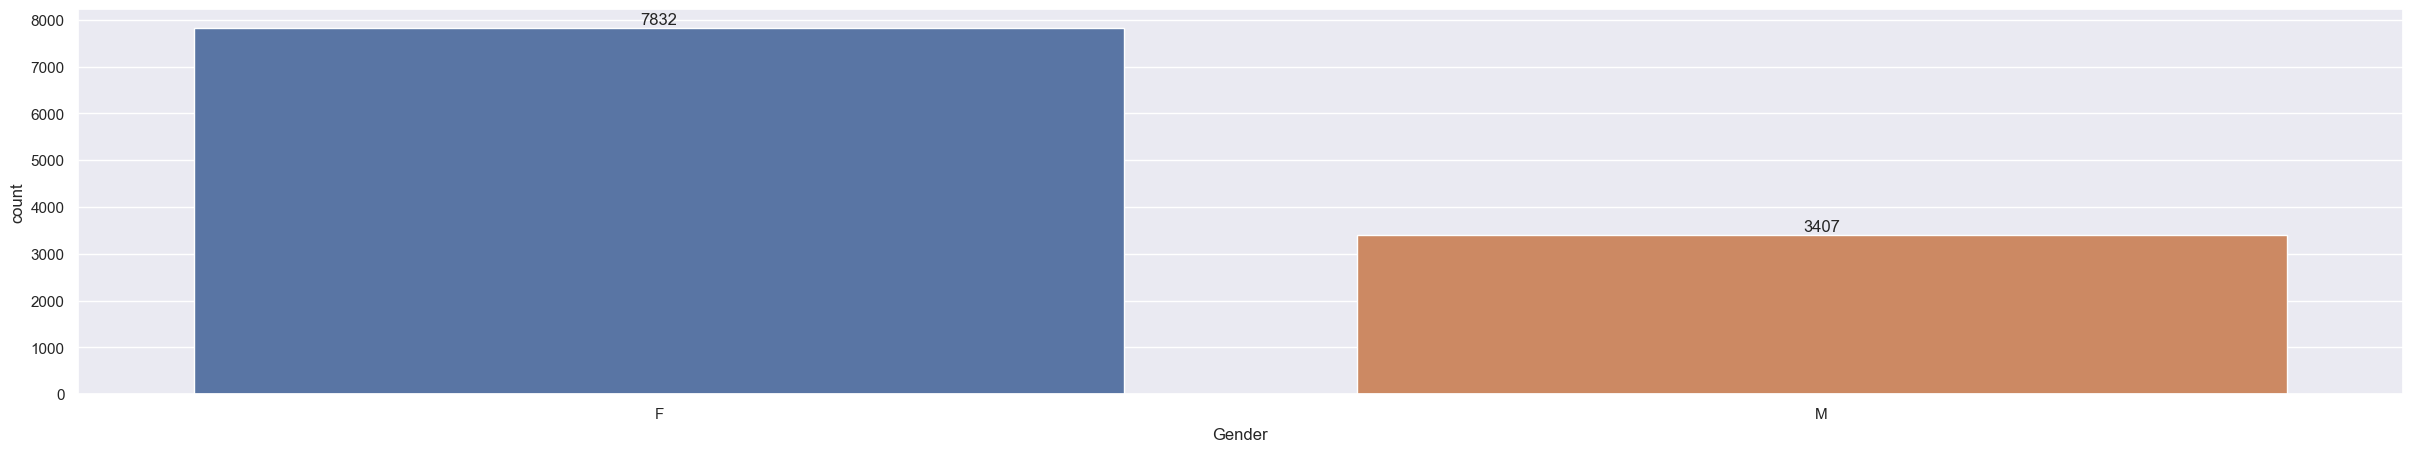

In [202]:
#Plotting a bar chart for gender and it's count
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [141]:
#Plotting a bar chart for gender vs Total amount spent by male and female
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values (by='Amount',ascending=False)
sales_gen

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

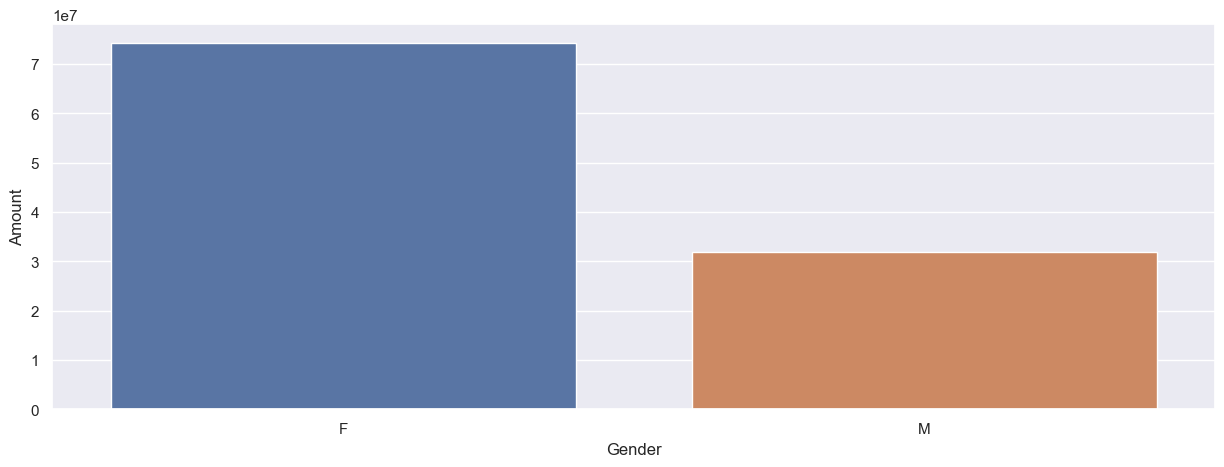

In [191]:
sns.barplot(x='Gender',y='Amount',data=sales_gen)

From above graph we can observe that most of the buyers are females and even the purchasing power of females are greater than men

Age

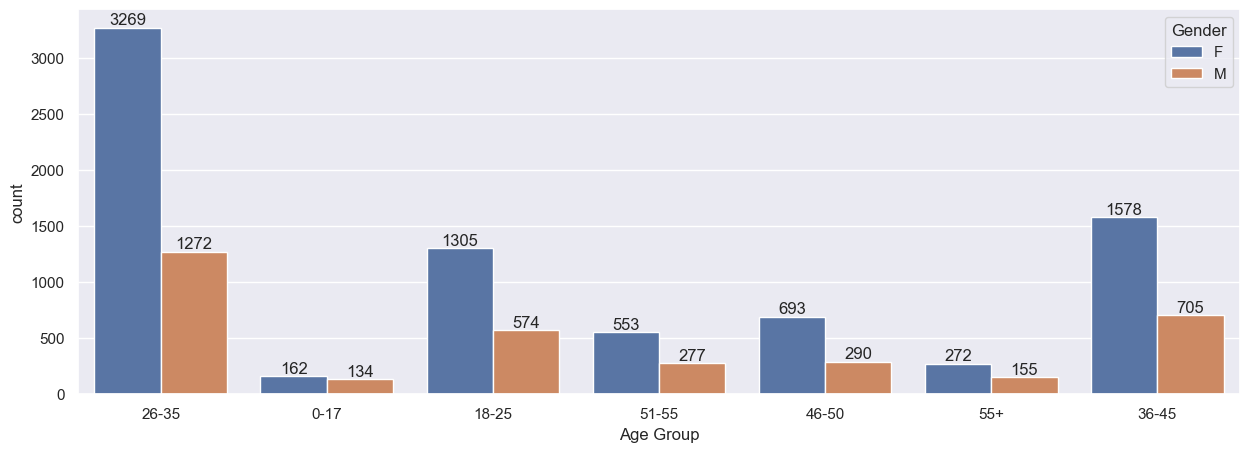

In [192]:
#Counting numbers of female and male in different age group
ax=sns.countplot(x='Age Group',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

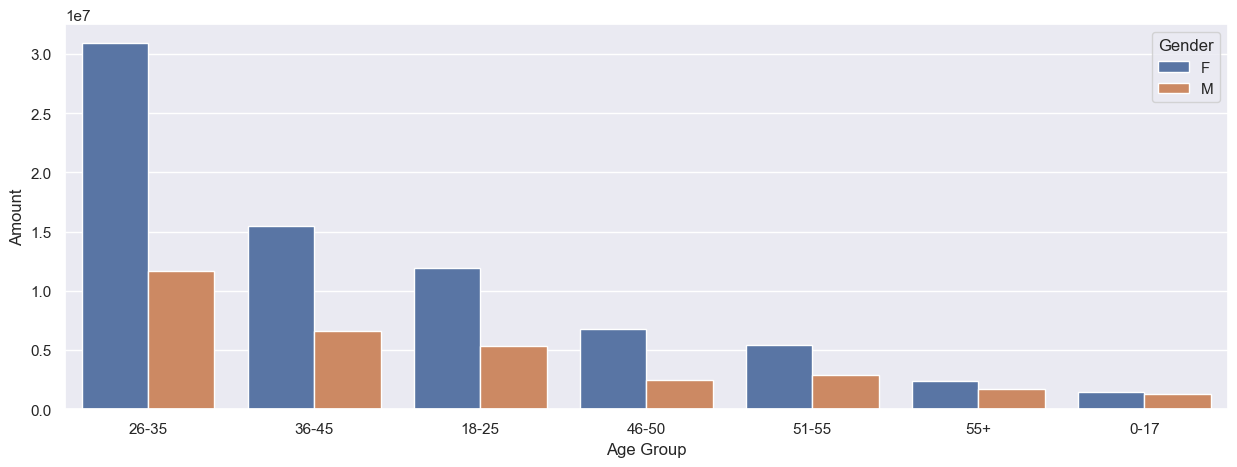

In [174]:
#Total amount spent by different age group
sales_Age = df.groupby(['Age Group','Gender'],as_index=False)['Amount'].sum().sort_values (by='Amount',ascending=False)
sns.barplot(x='Age Group',hue='Gender',y='Amount',data=sales_Age)

From above graph we can say that most of the buyers are of age group between 26-35 years female

State

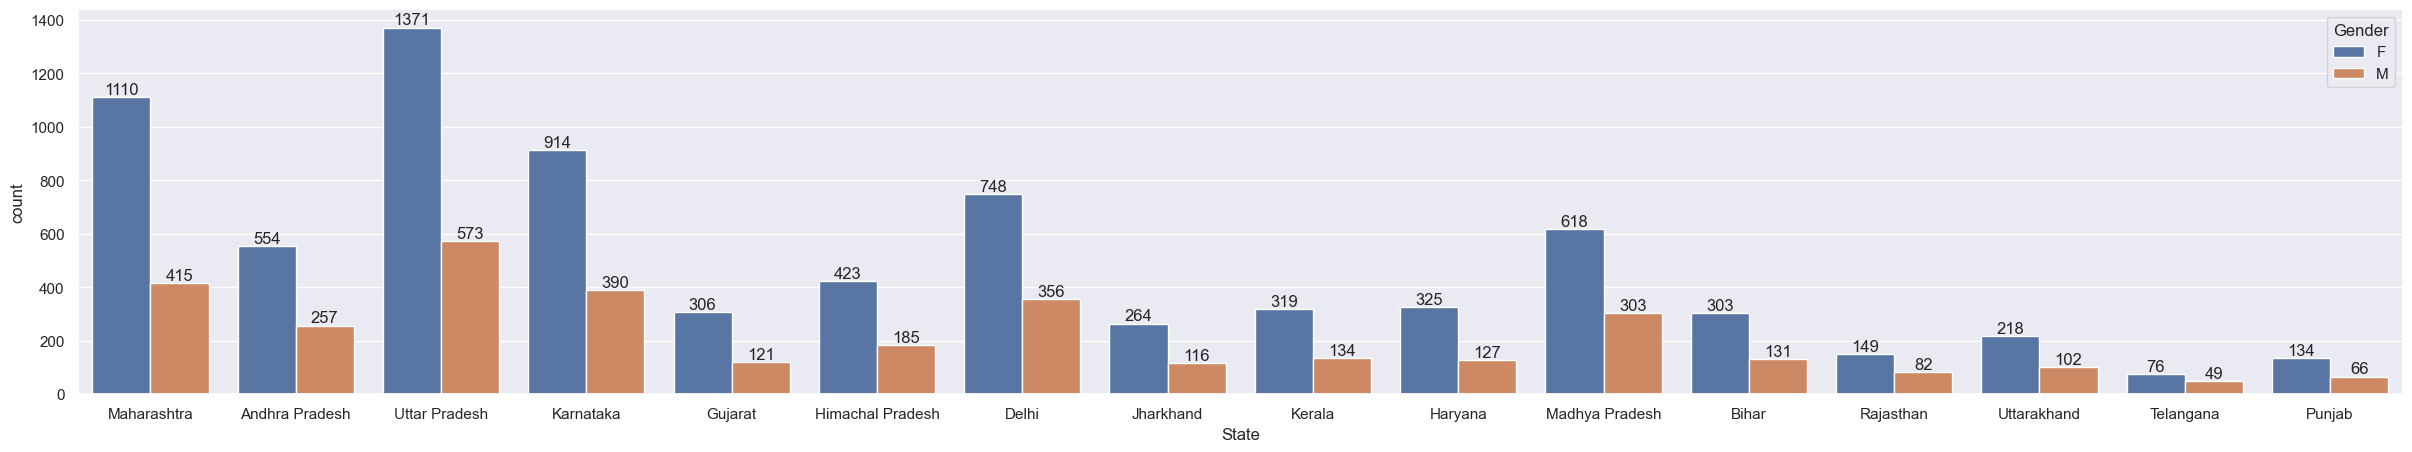

In [205]:
#Total number of buyers from different state
ax=sns.countplot(x='State',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

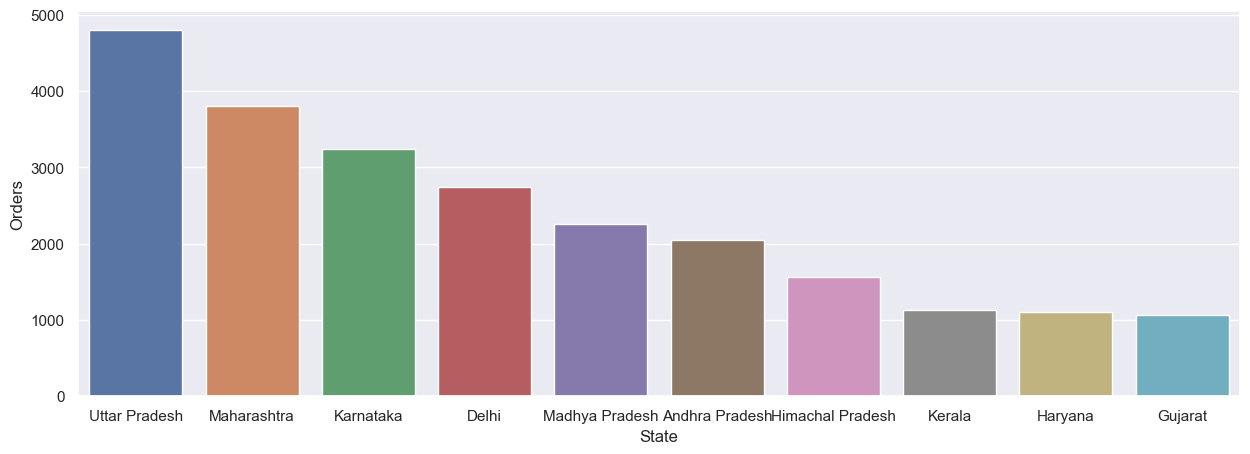

In [194]:
#Total number of orders from different state
sales_State = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values (by='Orders',ascending=False).head(10)
sns.barplot(x='State',y='Orders',data=sales_State)
sns.set(rc={'figure.figsize':(15,5)})

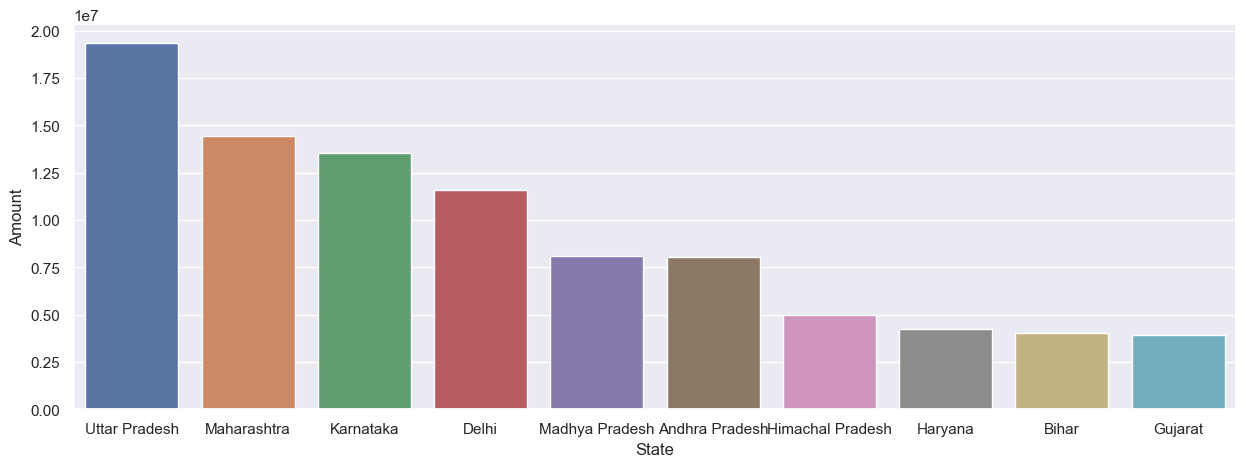

In [195]:
#Total sum of money spent by them while purchasing
sales_State = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values (by='Amount',ascending=False).head(10)
sns.barplot(x='State',y='Amount',data=sales_State)
sns.set(rc={'figure.figsize':(20,5)})


From tha above graphs we can see that most of the orders & total sales/amount are from uttar pradesh ,maharashtra and karnatka

Marital Status

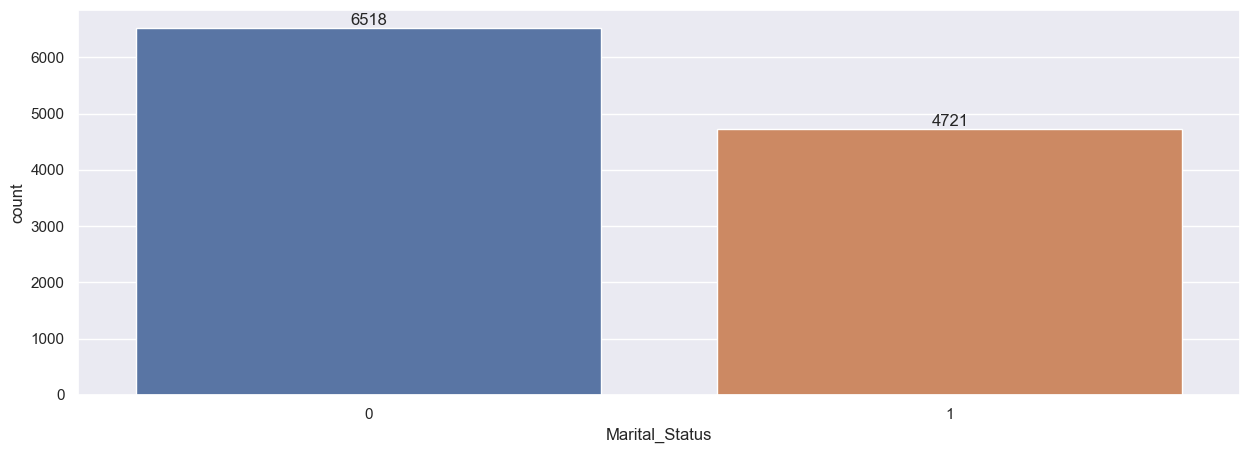

In [80]:
# No. of married and unmarried buyers
ax=sns.countplot(x='Marital_Status',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

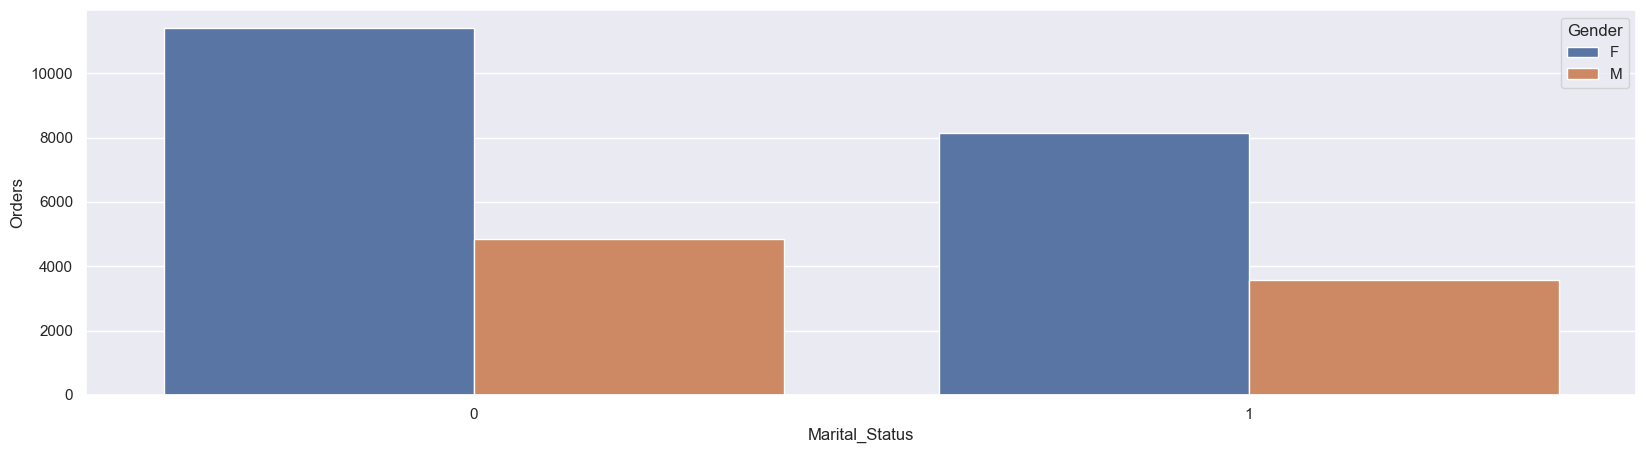

In [196]:
#Total number of orders from different state
sales_Marital_Status = df.groupby(['Marital_Status','Gender'],as_index=False)['Orders'].sum().sort_values (by='Orders',ascending=False).head(10)
sns.barplot(x='Marital_Status',y='Orders',data=sales_Marital_Status,hue='Gender')
sns.set(rc={'figure.figsize':(15,5)})


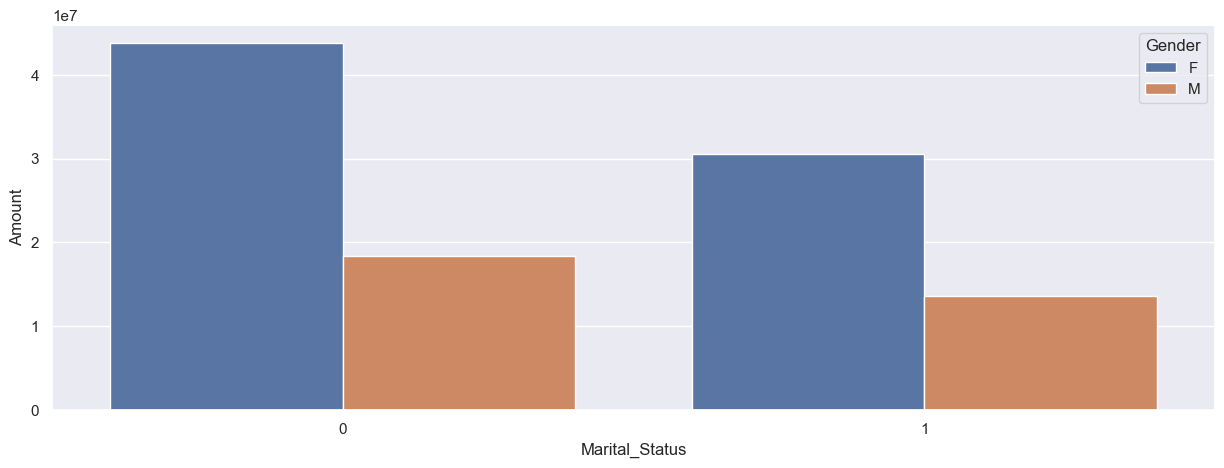

In [197]:
#Total sum of money spent by them while purchasing
sales_Marital_Status = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values (by='Amount',ascending=False).head(10)
sns.barplot(x='Marital_Status',y='Amount',data=sales_Marital_Status,hue='Gender')
sns.set(rc={'figure.figsize':(15,5)})

From the above we can see that most of the buyers are married (women) and they have high purchasing power

Occupation

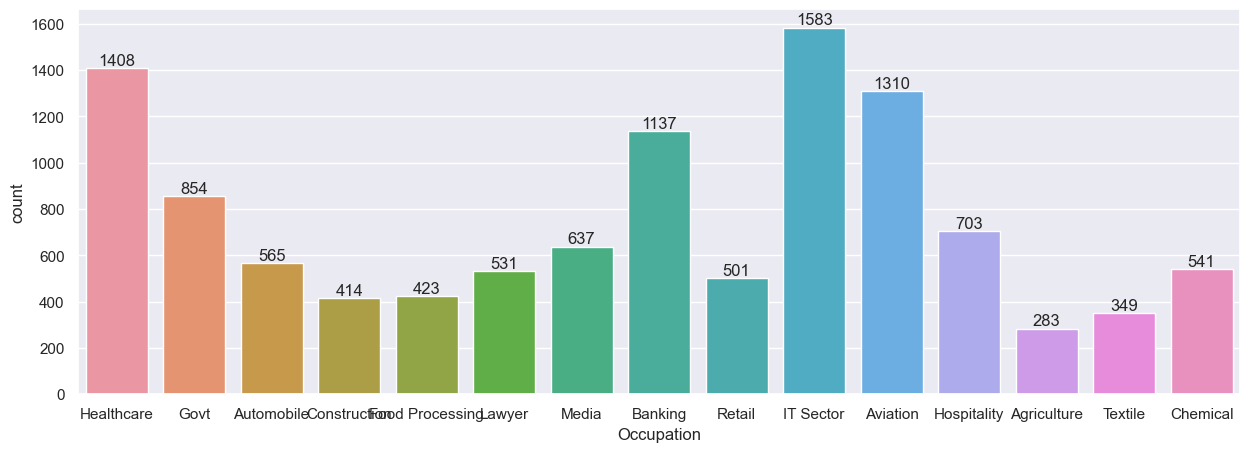

In [198]:
#Counting no. of buyers from different occupation
ax=sns.countplot(x='Occupation',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

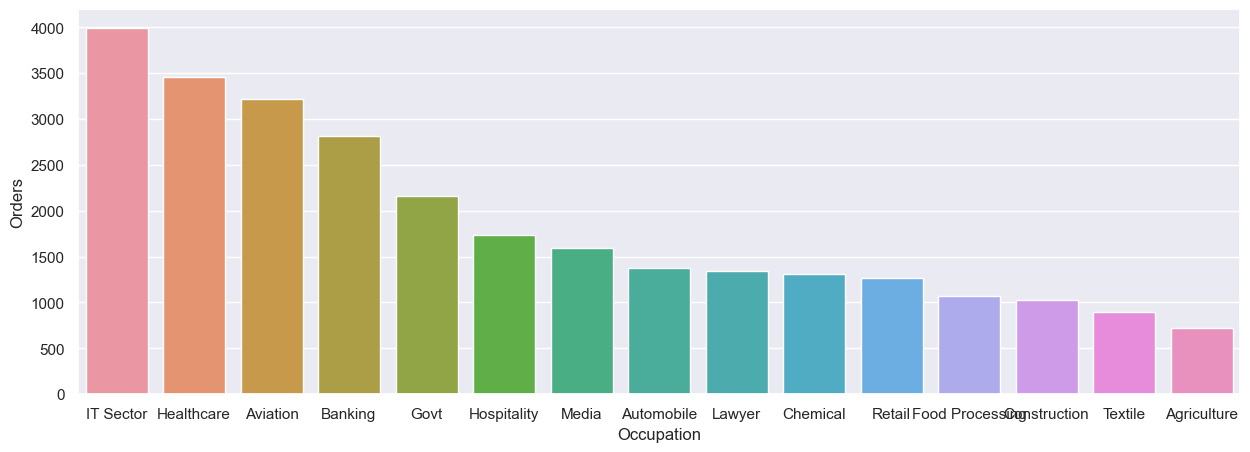

In [199]:
#Total no. of orders placed by them
sales_Occupation = df.groupby(['Occupation'],as_index=False)['Orders'].sum().sort_values (by='Orders',ascending=False)
sns.barplot(x='Occupation',y='Orders',data=sales_Occupation)
sns.set(rc={'figure.figsize':(15,5)})

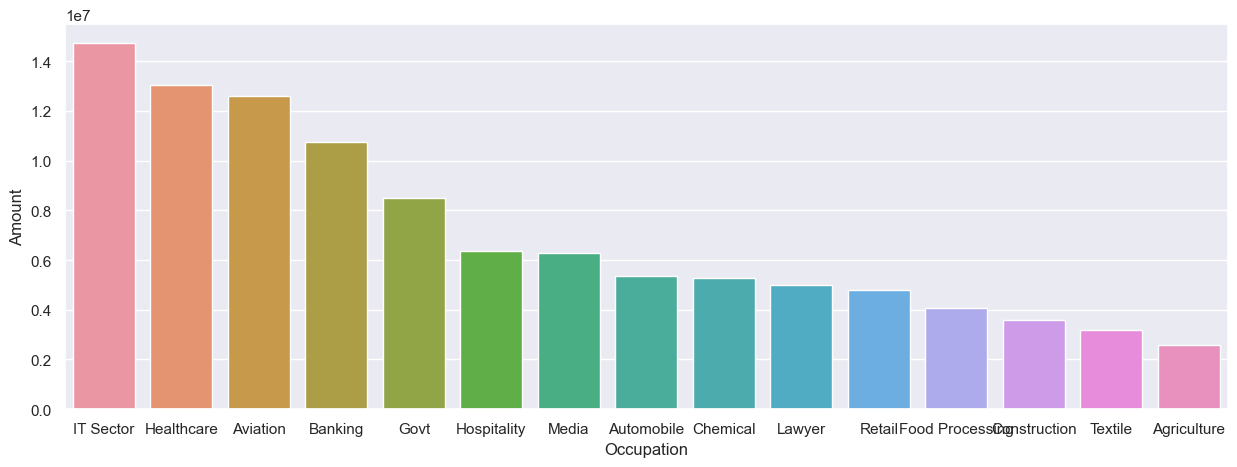

In [200]:
#Total sum of money spent by them while purchasing
sales_Occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values (by='Amount',ascending=False)
sns.barplot(x='Occupation',y='Amount',data=sales_Occupation)
sns.set(rc={'figure.figsize':(30,5)})

From the above graphs the most of thr buyers are from IT, healthcare, and aviation sector.

Product Category

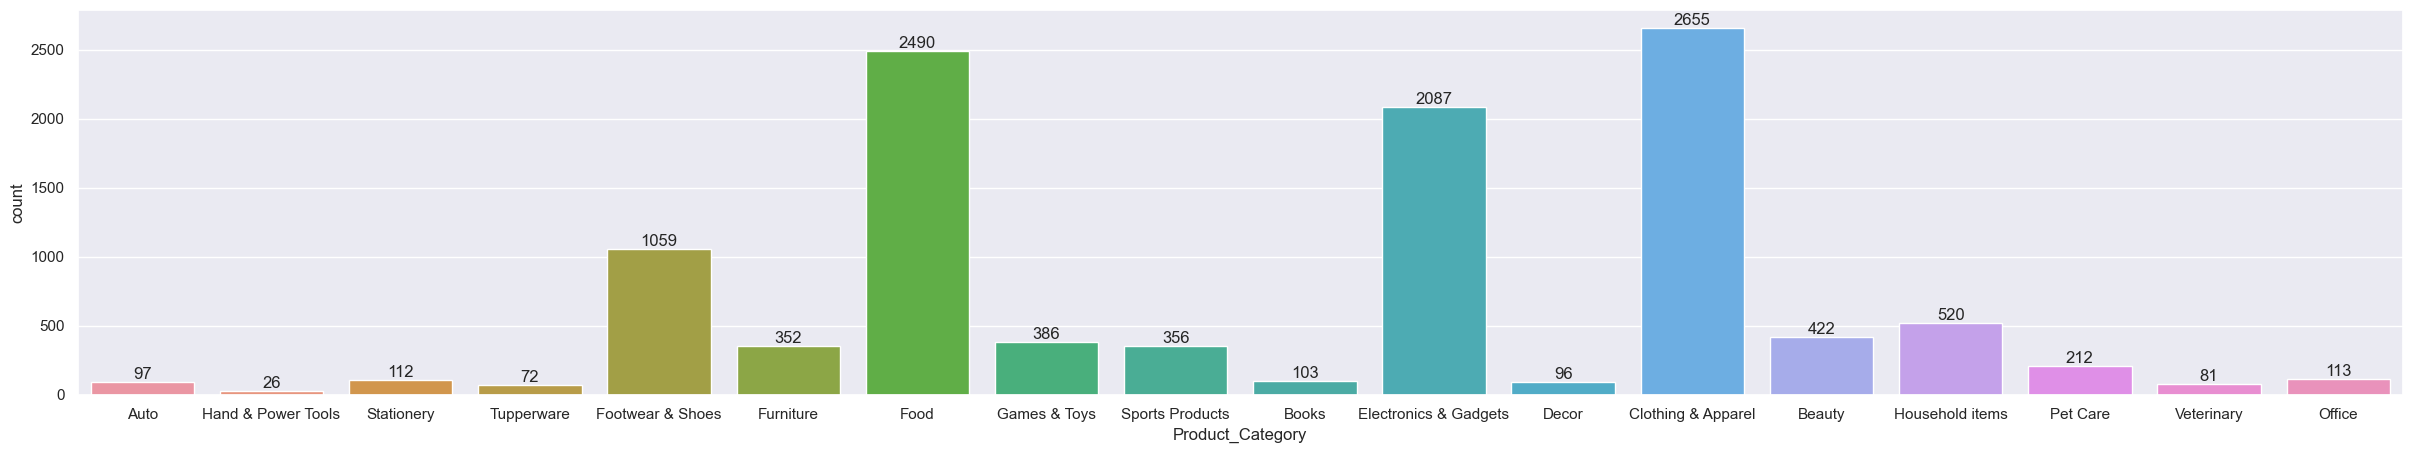

In [104]:
#Product category selling most
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

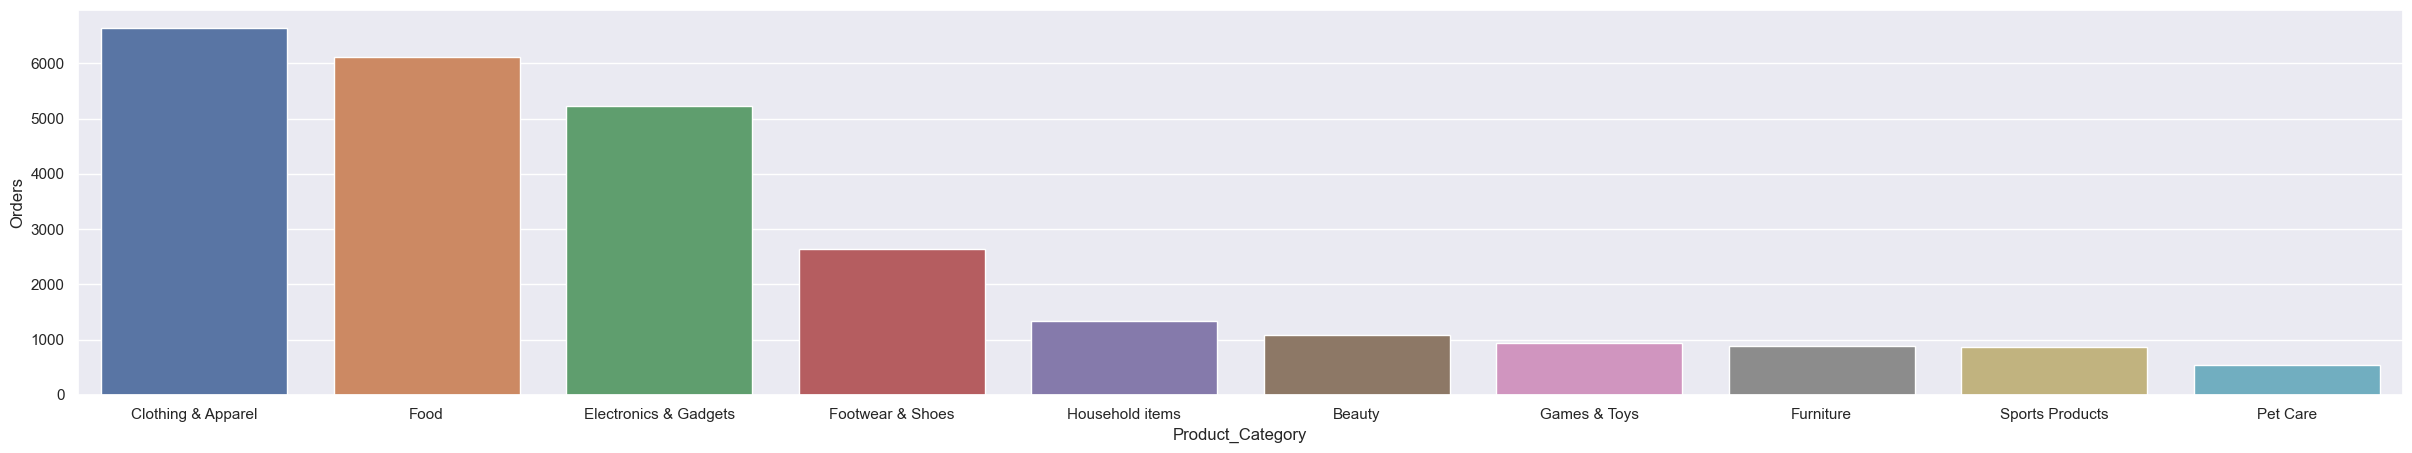

In [206]:
#Total number of orders from different category
sales_Product_Category = df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values (by='Orders',ascending=False).head(10)
sns.barplot(x='Product_Category',y='Orders',data=sales_Product_Category)
sns.set(rc={'figure.figsize':(20,5)})

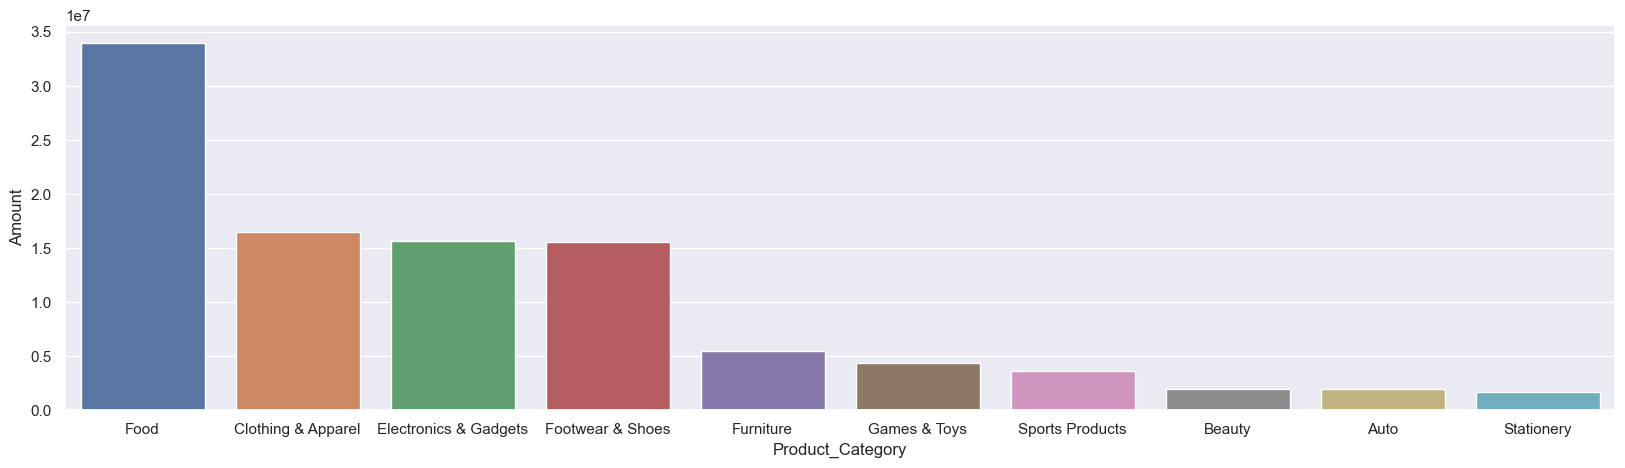

In [207]:
#Total sum of money spent for different category
sales_Product_Category = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values (by='Amount',ascending=False).head(10)
sns.barplot(x='Product_Category',y='Amount',data=sales_Product_Category)
sns.set(rc={'figure.figsize':(20,5)})

From above graph we can observe that most of the sold products are from food,clothing and electronic category

CONCLUSION

Married women of age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.